<a href="https://colab.research.google.com/github/Alexandr-M-85/Neural-University/blob/main/%D0%90%D1%80%D1%85%D0%B8%D1%82%D0%B5%D0%BA%D1%82%D1%83%D1%80%D0%B0_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B0_(Autoencoder)_Upro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание

Создайте автокодировщик, удаляющий черные квадраты в случайных областях изображений.

Алгоритм действий:
1. Возьмите базу картинок Mnist.
2. На картинках в случайных местах сделайте чёрные квадраты размера 8 на 8.
3. Создайте и обучите автокодировщик восстанавливать оригинальные изображения из "зашумленных" квадратом изображений.
4. Добейтесь MSE < 0.0070 на тестовой выборке

## Импорт библиотек

In [ ]:
# Отображение
import matplotlib.pyplot as plt

# Для работы с тензорами
import numpy as np 

# Класс создания модели
from tensorflow.keras.models import Model

# Для загрузки данных
from tensorflow.keras.datasets import mnist

# Необходимые слои
from tensorflow.keras.layers import Input, Conv2DTranspose, MaxPooling2D, Conv2D, BatchNormalization

# Оптимизатор
from tensorflow.keras.optimizers import Adam

## Данные

In [ ]:
# Загрузка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Нормировка данных
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [ ]:
# Изменение формы под удобную для Keras
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

## Автокодировщик

In [ ]:
###################################################################
###                 МЕСТО ДЛЯ ВАШЕГО ТВОРЧЕСТВА                 ###
###################################################################

In [ ]:
#сделаем копии xTrain и xTest
(noise_xTrain, _), (noise_xTest, _) = mnist.load_data()

In [ ]:
#в случайных местах на картинках сделаем черные квадраты разного размера
for c in range(len(noise_xTrain)):
    x = np.random.randint(20)
    y = np.random.randint(20)
    for i in range(x, x+8):
        for j in range(y, y+8):
            noise_xTrain[c][i,j] = 0

for c in range(len(noise_xTest)):
    x = np.random.randint(20)
    y = np.random.randint(20)
    for i in range(x, x+8):
        for j in range(y, y+8):
            noise_xTest[c][i,j] = 0

In [ ]:
#функция для вывода изображений
def plotImages(xTrain, pred, shape=(28, 28)):
    #зададим количество картинок, сколько хотим показать
    n = 10
    plt.figure(figsize=(30, 7))
    for i in range(n):
        index = np.random.randint(0, pred.shape[0])
        # Показываем картинки из тестового набора
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(xTrain[index].reshape(shape))
        plt.gray()
        #скрываем выводы координатных осей
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Показываем восстановленные картинки
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(pred[index].reshape(shape))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

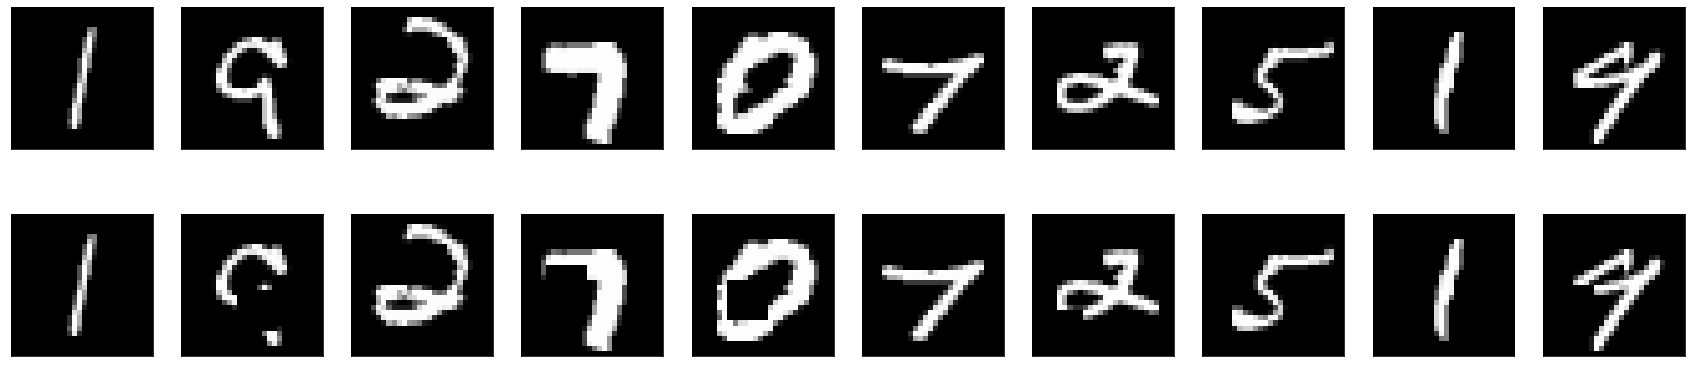

In [ ]:
#посмотрим что получилось
plotImages(X_train, noise_xTrain, shape=(28,28))

In [ ]:
#нормализуем данные и меняем форму
noise_xTrain = noise_xTrain.astype('float32') / 255
noise_xTrain = noise_xTrain.reshape(noise_xTrain.shape[0], 28, 28, 1)
noise_xTest = noise_xTest.astype('float32') / 255
noise_xTest = noise_xTest.reshape(noise_xTest.shape[0], 28, 28, 1)

In [ ]:
#проверим размерность
print(X_train.shape)
print(noise_xTrain.shape)
print(X_test.shape)
print(noise_xTest.shape)

(60000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)


### Модель

Epoch 1/20
600/600 [==============================] - 11s 15ms/step - loss: 0.0148 - val_loss: 0.0160
Epoch 2/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 3/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 4/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 5/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 6/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0039 - val_loss: 0.0063
Epoch 7/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0037 - val_loss: 0.0048
Epoch 8/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0036 - val_loss: 0.0041
Epoch 9/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0035 - val_loss: 0.0048
Epoch 10/20
600/600 [==============================] - 9s 15ms/step - loss: 0.0033 - val_l

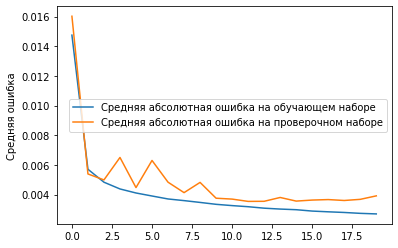

In [ ]:
img_input = Input((28,28,1))

x = Conv2D(32, (3,3), padding='same', activation='relu')(img_input)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D()(x)

x = Conv2D(64, (3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding='same',activation='relu')(x)
x = BatchNormalization()(x)
z = MaxPooling2D()(x)

x = Conv2DTranspose(64,(2,2), strides=(2,2), padding='same',activation='relu')(z)
x = BatchNormalization()(x)

x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(64,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2DTranspose(32,(3,3),strides=(2,2),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),padding='same',activation='relu')(x)
x = BatchNormalization()(x)

x = Conv2D(1,(3,3),activation='sigmoid', padding='same')(x)

model = Model(img_input,x) 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model.fit(noise_xTrain, X_train, epochs=20, batch_size=100,
                    validation_data = (noise_xTest, X_test))

plt.plot(history.history['loss'],label="Средняя абсолютная ошибка на обучающем наборе")
plt.plot(history.history['val_loss'],label="Средняя абсолютная ошибка на проверочном наборе")
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

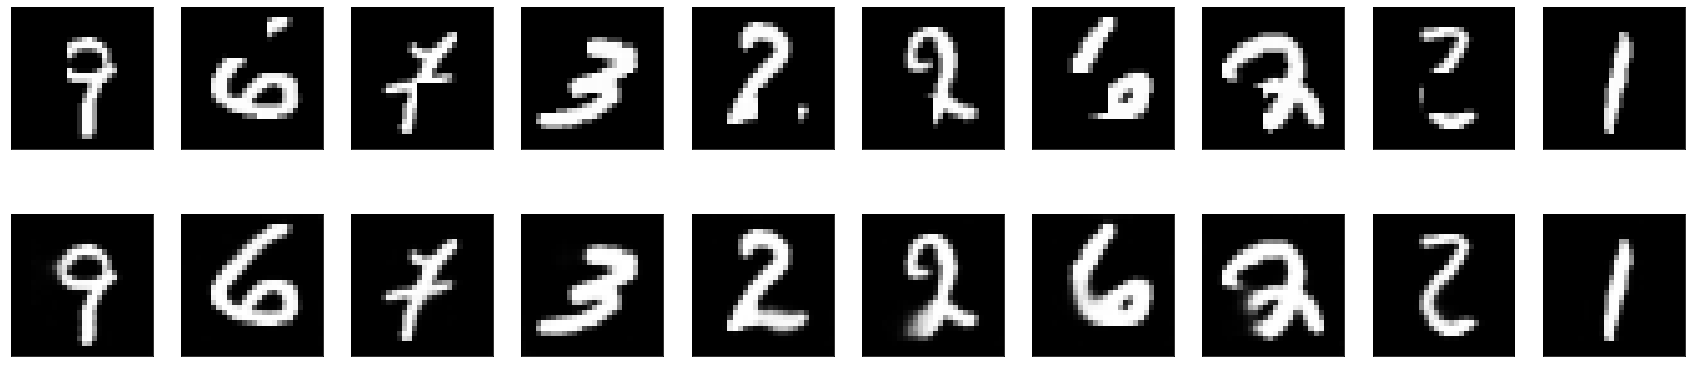

In [ ]:
predict = model.predict(noise_xTest)
plotImages(noise_xTest, predict, shape=(28,28))